In [1]:
import os
import tifffile
import numpy as np
import phathom.phenotype.mesh as mesh
import phathom.phenotype.niche as niche
import matplotlib.pyplot as plt

In [2]:
working_dir = '/media/jswaney/SSD EVO 860/organoid_phenotyping/20181210_eF9_A34_2'

# Load centers and cell-type labels

In [3]:
centers_path = 'centers.npy'
sox2_labels_path = 'sox2_labels.npy'
tbr1_labels_path = 'tbr1_labels.npy'

centers = np.load(os.path.join(working_dir, centers_path))
sox2_labels = np.load(os.path.join(working_dir, sox2_labels_path))
tbr1_labels = np.load(os.path.join(working_dir, tbr1_labels_path))

centers.shape

(1556799, 3)

In [4]:
voxel_size = (2.052, 1.082, 1.082)

centers_um = mesh.voxels_to_micron(centers, voxel_size)

# Query neighbors within a fixed radius

In [5]:
nbrs = niche.fit_neighbors(centers_um)
nbrs

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=-1, n_neighbors=5, p=2, radius=1.0)

In [6]:
nb_cells = 5000

(centers_um_sample,) = mesh.randomly_sample(nb_cells, centers_um)

In [6]:
radius = 60

distances, indices = niche.query_radius(nbrs, centers_um, radius)
distances[0]

array([ 0.        , 49.25936963, 52.84459647, 52.25944263, 43.74635418,
       40.62094701, 56.1877923 , 54.00975812, 57.91803602, 58.88453029,
       58.63148918, 29.22735499, 30.1650397 , 53.57721239, 53.01520295,
       41.6586862 , 41.70849199, 49.13185557, 45.61418222, 57.33497481,
       48.78124332, 32.54278765, 40.77570752, 40.11268448, 36.98456857,
       58.88144856, 38.38503339])

In [7]:
np.save(os.path.join(working_dir, 'distances.npy'), distances)
np.save(os.path.join(working_dir, 'indices.npy'), indices)

In [6]:
radius = 60

distances = np.load(os.path.join(working_dir, 'distances.npy'))
indices = np.load(os.path.join(working_dir, 'indices.npy'))

In [7]:
total = 0
for idx in indices:
    total += len(idx)
total / len(indices)

354.3686737979662

In [19]:
sox2_counts = niche.neighborhood_counts(indices, sox2_labels)
tbr1_counts = niche.neighborhood_counts(indices, tbr1_labels)
dn_counts = niche.neighborhood_counts(indices, ~np.logical_or(sox2_labels, tbr1_labels))

sox2_counts.max(), tbr1_counts.max(), dn_counts.max()

(537, 382, 553)

In [20]:
np.save(os.path.join(working_dir, 'sox2_counts.npy'), sox2_counts)
np.save(os.path.join(working_dir, 'tbr1_counts.npy'), tbr1_counts)
np.save(os.path.join(working_dir, 'dn_counts.npy'), dn_counts)

In [7]:
sox2_counts = np.load(os.path.join(working_dir, 'sox2_counts.npy'))
tbr1_counts = np.load(os.path.join(working_dir, 'tbr1_counts.npy'))
dn_counts = np.load(os.path.join(working_dir, 'dn_counts.npy'))

In [21]:
sox2_directions = niche.neighborhood_directionality(centers_um, indices, sox2_labels)
tbr1_directions = niche.neighborhood_directionality(centers_um, indices, tbr1_labels)
dn_directions = niche.neighborhood_directionality(centers_um, indices, ~np.logical_or(sox2_labels, tbr1_labels))

sox2_directions.max(axis=0), sox2_directions.min(axis=0)

  0%|          | 481/1556799 [00:00<33:17, 779.07it/s]


KeyboardInterrupt: 

In [7]:
tbr1_directions.max(axis=0), tbr1_directions.min(axis=0)

100%|██████████| 1556799/1556799 [00:40<00:00, 38059.02it/s]


(array([6.7984019 , 6.92771066, 6.64763373]),
 array([-7.08894416, -6.97008655, -7.11066935]))

In [9]:
dn_directions.max(axis=0), dn_directions.min(axis=0)

100%|██████████| 1556799/1556799 [01:33<00:00, 16640.98it/s]


(array([7.34672817, 7.72976774, 7.5000084 ]),
 array([-7.74721064, -7.30131305, -7.40451325]))

In [7]:
np.save(os.path.join(working_dir, 'sox2_directions.npy'), sox2_directions)
np.save(os.path.join(working_dir, 'tbr1_directions.npy'), tbr1_directions)
np.save(os.path.join(working_dir, 'dn_directions.npy'), dn_directions)

In [7]:
sox2_directions = np.load(os.path.join(working_dir, 'sox2_directions.npy'))
tbr1_directions = np.load(os.path.join(working_dir, 'tbr1_directions.npy'))
dn_directions = np.load(os.path.join(working_dir, 'dn_directions.npy'))

In [51]:
projections = niche.directionality_projection(sox2_directions, tbr1_directions, dn_directions)

projections

array([[0.        , 0.        , 0.        ],
       [0.83646929, 0.83646929, 0.        ],
       [1.31644676, 1.31644676, 0.        ],
       ...,
       [1.36878901, 1.14944088, 1.31342708],
       [0.78881201, 1.43032437, 1.59683632],
       [2.99974626, 2.78711995, 1.74368599]])

In [52]:
projections.mean(axis=0)

array([1.08310935, 1.67790317, 1.23937531])

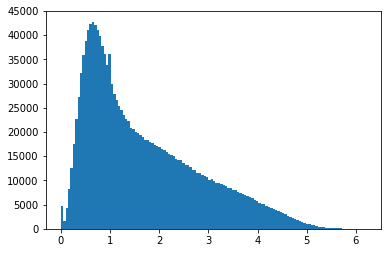

In [54]:
plt.hist(projections[:, 1], bins=128)
plt.show()

In [8]:
bins = 3

sox2_profiles = niche.radial_profile(centers_um, distances, indices, radius, bins, sox2_labels)

100%|██████████| 1556799/1556799 [00:19<00:00, 79135.34it/s] 


In [9]:
tbr1_profiles = niche.radial_profile(centers_um, distances, indices, radius, bins, tbr1_labels)

100%|██████████| 1556799/1556799 [00:12<00:00, 125148.69it/s]


In [10]:
dn_labels = np.logical_not(np.logical_or(sox2_labels, tbr1_labels))

In [11]:
dn_profiles = niche.radial_profile(centers_um, distances, indices, radius, bins, dn_labels)

100%|██████████| 1556799/1556799 [00:25<00:00, 61227.20it/s]


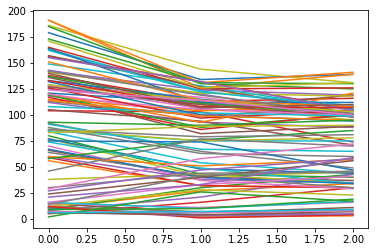

In [12]:
plt.plot(sox2_profiles[:100].T)
plt.show()

In [14]:
np.save(os.path.join(working_dir, 'sox2_profiles.npy'), sox2_profiles)
np.save(os.path.join(working_dir, 'tbr1_profiles.npy'), tbr1_profiles)
np.save(os.path.join(working_dir, 'dn_profiles.npy'), dn_profiles)

In [117]:
# features = np.hstack([sox2_counts[:, np.newaxis], 
#                       tbr1_counts[:, np.newaxis],
#                       dn_counts[:, np.newaxis],
#                       np.linalg.norm(sox2_directions, axis=-1)[:, np.newaxis],
#                       np.linalg.norm(tbr1_directions, axis=-1)[:, np.newaxis],
#                       np.linalg.norm(dn_directions, axis=-1)[:, np.newaxis],
#                       projections])
# features = np.hstack([sox2_counts[:, np.newaxis], 
#                       tbr1_counts[:, np.newaxis],
#                       dn_counts[:, np.newaxis],
#                       sox2_directions,
#                       tbr1_directions,
#                       dn_directions,
#                       projections])
# features = features[:, 6:]
features = np.hstack([sox2_profiles, tbr1_profiles])
# features = dn_profiles
features.shape

(1556799, 6)

In [118]:
from sklearn.preprocessing import scale

In [119]:
features_scaled = scale(features)

In [120]:
import seaborn as sns

In [128]:
np.random.seed(987)
(feat,), sample_idx = mesh.randomly_sample(20000, features_scaled, return_idx=True)

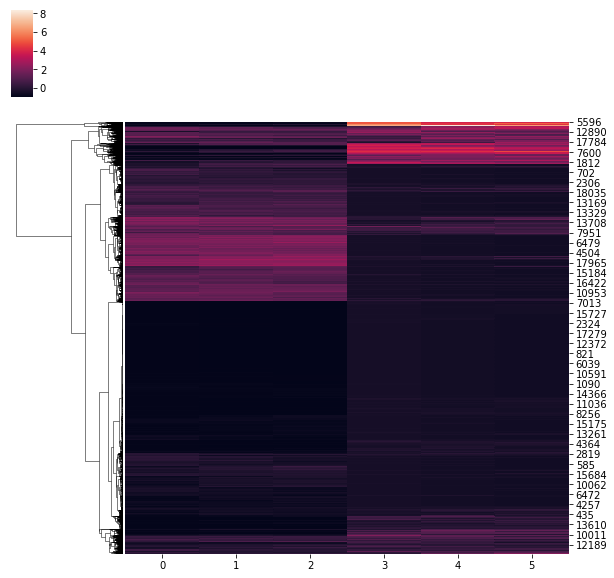

In [129]:
linkage = 'centroid'

g = sns.clustermap(feat, col_cluster=False, method=linkage)
plt.show()

try Gaussian Mixture (Dirichlet prior for unknown cluster number)

In [79]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

/home/jswaney/anaconda3/envs/phathom/lib/python3.7/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


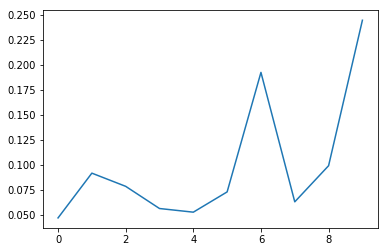

10

In [80]:
dpgmm = BayesianGaussianMixture(n_components=10, 
                                covariance_type='full', 
                                weight_concentration_prior=1e-3).fit(feat)

plt.plot(dpgmm.weights_)
plt.show()

labels = dpgmm.predict(feat)
n_clusters = len(np.unique(labels))
n_clusters

In [87]:
np.random.seed(456)
gmm = GaussianMixture(n_components=3).fit(feat)
gmm.weights_

array([0.4163438, 0.2233732, 0.360283 ])

In [88]:
labels = gmm.predict(feat)
n_clusters =  len(np.unique(labels))

Try hierarchical clustering (works fine with centroid method)

In [123]:
from scipy.cluster.hierarchy import centroid, cut_tree, fclusterdata

In [124]:
# Hierarchical clustering 
n_clusters = 4
labels = fclusterdata(feat, n_clusters, criterion='maxclust', method='centroid')
labels -= 1

Try DBSCAN (didn't work)

In [104]:
from sklearn.cluster import DBSCAN

In [115]:
dbscan = DBSCAN(eps=1.0, min_samples=2).fit(feat)
labels = dbscan.labels_ + 1

In [116]:
np.unique(labels)

array([1])

In [111]:
n_clusters = len(np.unique(labels))

Plot TSNE colored by cluster label

In [125]:
colors = mesh.colormap_to_colors(n_clusters)

In [126]:
%matplotlib inline

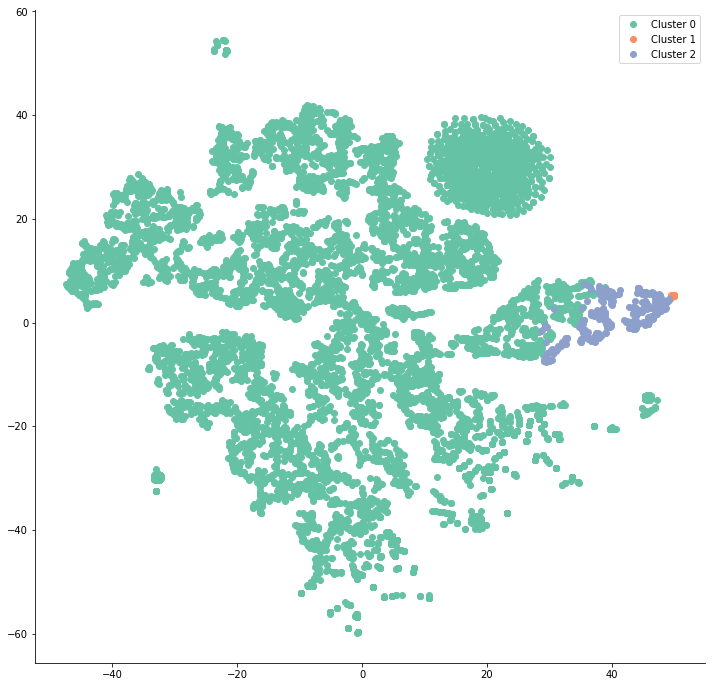

In [127]:
np.random.seed(456)
plt.figure(figsize=(12, 12))
mesh.plot_tsne(feat, labels, colors)

In [232]:
profiles = features[sample_idx]
profiles.shape

(20000, 15)

In [226]:
labels.shape

(20000,)

In [230]:
for c in range(n_clusters):
    idx = np.where(labels == c)[0]
    cluster_profiles = profiles[idx]
    sox2_ave = cluster_profiles[:, :5].mean()
    tbr1_ave = cluster_profiles[:, 5:10].mean()
    dn_ave = cluster_profiles[:, 10:].mean()

    print(f'Count {len(idx)}, SOX2 ave {sox2_ave}, TBR1 ave {tbr1_ave}, DN ave {dn_ave}')

Count 6537, SOX2 ave 68.5185253174239, TBR1 ave 0.0, DN ave 68.5185253174239
Count 2678, SOX2 ave 0.0, TBR1 ave 0.0, DN ave 66.36265870052277
Count 2053, SOX2 ave 0.0, TBR1 ave 73.02269849001462, DN ave 73.02269849001462
Count 8393, SOX2 ave 73.60745859644942, TBR1 ave 73.60745859644942, DN ave 73.60745859644942
Count 339, SOX2 ave 74.88436578171091, TBR1 ave 39.730973451327436, DN ave 0.0


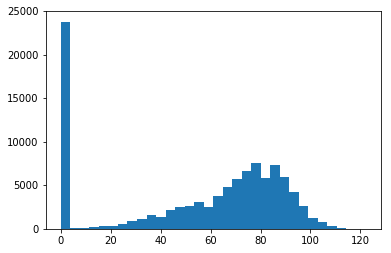

In [233]:
plt.hist(profiles[:, :5].ravel(), bins=32)
plt.show()

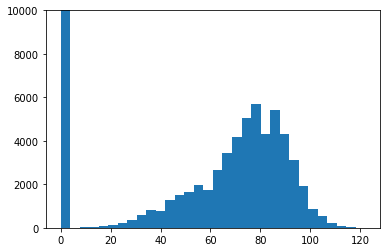

In [235]:
plt.hist(profiles[:, 5:10].ravel(), bins=32)
plt.ylim([0, 10000])
plt.show()

In [237]:
profiles[:10]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 101.,
        103.,  85.,  77.,  87.],
       [  0.,   0.,   0.,   0.,   0.,  88.,  89.,  84.,  89.,  83.,  88.,
         89.,  84.,  89.,  83.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  77.,
         70.,  84.,  82.,  70.],
       [ 80.,  79.,  90.,  82.,  77.,   0.,   0.,   0.,   0.,   0.,  80.,
         79.,  90.,  82.,  77.],
       [ 67.,  78.,  62.,  61.,  72.,   0.,   0.,   0.,   0.,   0.,  67.,
         78.,  62.,  61.,  72.],
       [ 85.,  94.,  96.,  96.,  82.,  85.,  94.,  96.,  96.,  82.,  85.,
         94.,  96.,  96.,  82.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  53.,
         41.,  47.,  43.,  36.],
       [  0.,   0.,   0.,   0.,   0.,  61.,  75.,  71.,  64.,  56.,  61.,
         75.,  71.,  64.,  56.],
       [  0.,   0.,   0.,   0.,   0.,  95.,  91.,  83.,  89.,  98.,  95.,
         91.,  83.,  89.,  98.],
       [ 65.,  56.,  49.,  53.,  42.,

In [32]:
import pandas as pd

In [37]:
dn_profiles.shape, dn_labels.shape

((12277, 10), (12277,))

In [52]:
sox2_mean = dn_profiles[:, :5].mean(axis=-1)
tbr1_mean = dn_profiles[:, 5:].mean(axis=-1)

mean_counts = np.concatenate([sox2_mean, tbr1_mean])
expression = len(sox2_mean)*['SOX2'] + len(tbr1_mean)*['TBR1']
cluster = np.concatenate([dn_labels, dn_labels])

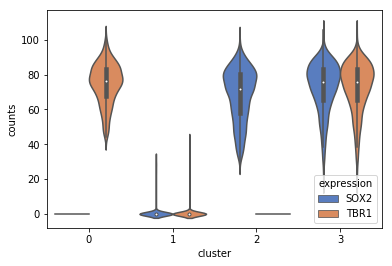

In [54]:
df = pd.DataFrame({'counts': mean_counts,
                   'cluster': cluster,
                   'expression': expression})

ax = sns.violinplot(x="cluster", y='counts', hue='expression', data=df, palette="muted")

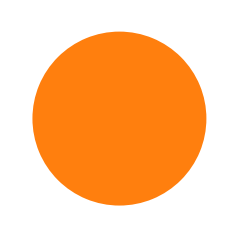

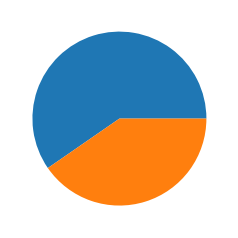

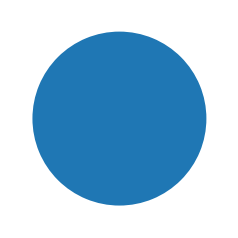

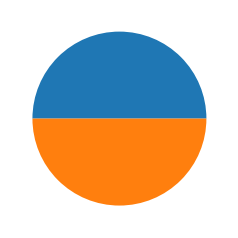

In [64]:
for c in np.unique(dn_labels):
    cluster_idx = np.where(dn_labels == c)[0]
    sox2_cluster = sox2_mean[cluster_idx].mean()
    tbr1_cluster = tbr1_mean[cluster_idx].mean()
    plt.figure()
    plt.pie([sox2_cluster, tbr1_cluster])
    plt.show()